<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jeesperon/blob/main/Act_Sem6_visualizaci%C3%B3n_a01372413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 6, visualización

Ciencia y analítica de datos (Gpo 10)

Profesora: Maria de la Paz Rico Fernandez

Alumno: Jose Eduardo Esperon Carreon

Matricula: A01372413

In [46]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### 1. Descarga los datos y carga el dataset en tu libreta

In [48]:
dataB = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df=pd.read_csv(dataB)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


###2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [49]:
print('Este es el número de filas y columnas del dataset:\n\n',df.shape,'\n\n')
print('Estas son las columnas del dataset:\n\n',df.columns,'\n\n')
print('Estos son los tipos de datos del dataset:\n\n',df.dtypes,'\n\n')

Este es el número de filas y columnas del dataset:

 (30000, 25) 


Estas son las columnas del dataset:

 Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object') 


Estos son los tipos de datos del dataset:

 ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object 




In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [51]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [52]:
for label in  df.columns:           
  df[label].fillna(df[label].mean(), inplace = True)

In [53]:
df.isnull().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

###4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [54]:
df[['X1','X2','X3','X4','X5']].describe()

,X1,X2,X3,X4,X5
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214
std,129747.661567,0.489117,0.790293,0.521950,9.217256
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


In [55]:
df[['X6','X7','X8','X9','X10','X11']].describe()

,X6,X7,X8,X9,X10,X11
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,-0.291136
std,1.123773,1.197154,1.195908,1.168977,1.132994,1.149865
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [56]:
df[['X12','X13','X14','X15','X16','X17']].describe()

,X12,X13,X14,X15,X16,X17
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745
std,73631.715966,71170.333204,6.934583e+04,64329.411150,60792.752471,59551.384923
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3566.750000,2986.750000,2.674750e+03,2332.000000,1769.500000,1258.500000
50%,22400.000000,21228.500000,2.010800e+04,19066.000000,18123.000000,17100.500000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50177.000000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [57]:
df[['X18','X19','X20','X21','X22','X23']].describe()

,X18,X19,X20,X21,X22,X23
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000
50%,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


###5. Realiza el conteo de las variables categóricas

De acuerdo con la documentación, las variables las podemos tomar de dos tipo, numéricas o categóricas donde:

* Categéricas: X2, X3, X4, X6, X7, X8, X9, X10, X11, siendo un total de 9 variables categóricas
* Numéricas: X1, X5, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, siendo un total de 14 variables numéricas


In [58]:
categoricas = df[['X2', 'X3', 'X4', 'X6', 'X7', 'X8','X9', 'X10', 'X11']]
numericas = df[['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']]

In [59]:
categoricas.describe()

,X2,X3,X4,X6,X7,X8,X9,X10,X11
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603753,1.853057,1.551903,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,-0.291136
std,0.489117,0.790293,0.521950,1.123773,1.197154,1.195908,1.168977,1.132994,1.149865
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [60]:
numericas.describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.484214,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,129747.661567,9.217256,73631.715966,71170.333204,6.934583e+04,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3566.750000,2986.750000,2.674750e+03,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000
50%,140000.000000,34.000000,22400.000000,21228.500000,2.010800e+04,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


###6. Escala los datos, si consideras necesario

In [62]:
scaler = preprocessing.StandardScaler().fit(numericas)
df_numNORM = scaler.transform(numericas)
df_numNORM = pd.DataFrame(df_numNORM)
df_numNORM.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.136720,-1.245968,-0.642721,-0.647594,-0.668203,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426
1,-0.365981,-1.028980,-0.659440,-0.666943,-0.639463,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922
2,-0.597202,-0.161028,-0.298760,-0.494087,-0.482609,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165
3,-0.905498,0.164454,-0.057678,-0.013457,0.032672,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174
4,-0.905498,2.334333,-0.578834,-0.611511,-0.161373,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231


###7. Reduce las dimensiones con PCA, si consideras necesario.

a. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
b. Indica la importancia de las variables en cada componente


In [63]:
pcs = PCA()
pcs.fit(df_numNORM.iloc[:,:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.432941,1.310044,1.022324,0.961743,0.940033,0.934185,0.882931,0.852417,0.840979,0.514244,0.266515,0.202680,0.159262,0.152457
Proportion of variance,0.422786,0.122583,0.074651,0.066066,0.063117,0.062334,0.055681,0.051899,0.050516,0.018888,0.005073,0.002934,0.001812,0.001660
Cumulative proportion,0.422786,0.545369,0.620020,0.686085,0.749202,0.811536,0.867217,0.919116,0.969632,0.988521,0.993594,0.996528,0.998340,1.000000


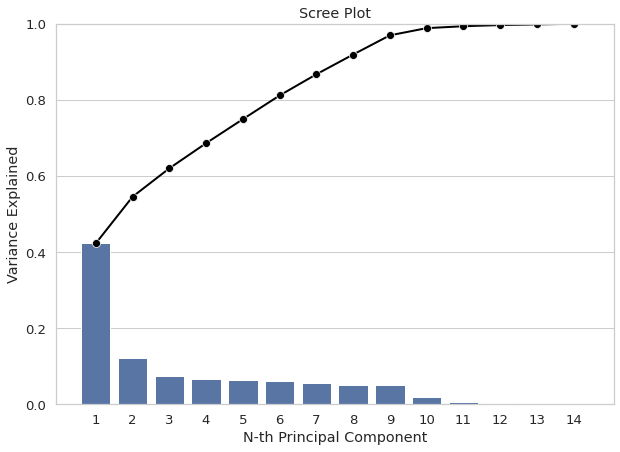

In [64]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

###8. Elabora los histogramas de los atributos para visualizar su distribución

###9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


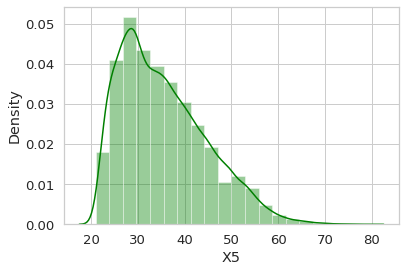

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt 
from warnings import filterwarnings
sns.distplot(df['X5'], kde = True, color ='green', bins = 20)

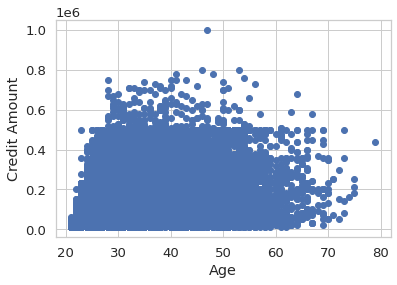

In [80]:
import matplotlib.pyplot as plt

age = df['X5']

creditamount = df['X1']
plt.ylabel('Credit Amount')
plt.xlabel('Age')
plt.scatter(age, creditamount)

plt.show()

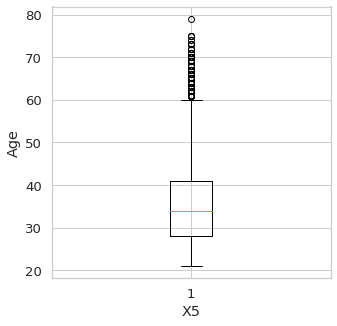

In [82]:
fig = plt.figure(figsize =(5, 5))
 
# Creating plot
plt.boxplot(df['X5'])
plt.ylabel('Age')
plt.xlabel('X5')
# show plot
plt.show()

###10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.